In [4]:
import numpy as np  # arrays
import matplotlib.pyplot as plt  # 2d plotting
from mpl_toolkits.mplot3d import axes3d  # 3d plotting
from numpy.linalg import norm
import time

## Problem 1

In [35]:
def QObjFunc(x): # f
    return (x[0] - 1)**2 + (2*x[1] - 1)**2
def QGradObjFunc(x): # gradient of f
    return np.array([2*(x[0] - 1), 2*(2*x[1] - 1)])

In [36]:
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol, maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [37]:
alpha = 0.3 #I chose this value because it is approximately in the middle of the range of alpha
tol = 1e-8
x0 = np.array([4, 1])
maxIter = 1e6

x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, alpha, x0, tol, maxIter)

Found the minimizer at [1.  0.5] with 23 iterations successfully, gradient's norm is 4.222124871944294e-09.


In [38]:
err = np.linalg.norm(np.diff(path_2,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]   # limit value

0.39999999439031875

In [39]:
alpha_2 = 0.2 
x_3, iter_3, path_3 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc, alpha_2, x0, tol, maxIter)
err = np.linalg.norm(np.diff(path_3,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]   # limit value

Found the minimizer at [1.  0.5] with 40 iterations successfully, gradient's norm is 8.020496711225178e-09.


0.6000000199329446

## Problem 2 Newton's Method

In [5]:
def WolfeI(alpha,f,x,y,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x+alpha*p[0], y+alpha*p[1])
    RHS = f(x,y)-c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [6]:
a,b = 1,100    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])

In [7]:
x,y = 1.2,1.2    # initial point
path_Newton = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
rho = 0.75            # rho for backtracking
i=0                   # iteration count
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -np.linalg.solve(D2f(x,y),dx)  # faster to solve a system than manually invert
    alpha = 1
    j = 0   # keep track of how many backtracking iterations
    while not WolfeI(alpha,f,x,y,dx,pk):
        alpha *= rho
        j += 1
        if i == 0:
            print(f'In iteration {i}, 1st backtrack: alpha={alpha}')
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_Newton.append([xnew,ynew])
    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1
    print(f'In iteration {i}, alpha={alpha} after {j} backtracks, and newx={x}')

path_Newton=np.array(path_Newton)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

In iteration 1, alpha=1 after 0 backtracks, and newx=1.1959183673469387
In iteration 2, alpha=0.5625 after 2 backtracks, and newx=1.0860802602485584
In iteration 3, alpha=1 after 0 backtracks, and newx=1.0608688670326778
In iteration 4, alpha=1 after 0 backtracks, and newx=1.0068651122729955
In iteration 5, alpha=1 after 0 backtracks, and newx=1.002529108862995
In iteration 6, alpha=1 after 0 backtracks, and newx=1.000009474292406
In iteration 7, alpha=1 after 0 backtracks, and newx=1.0000000120143648
In iteration 8, alpha=1 after 0 backtracks, and newx=1.0000000000000002
After 8 iterations, approximate minimum is 4.930380657631324e-32 at (1.0000000000000002, 1.0000000000000004)


## Problem 3 SR1

In [43]:
def approx_convergence_rate(path, minimizer, numToAvg=100, showPlot=False):
    '''Given a path defined by an iteration and a known minimizer, approximates convergence rate'''
    err = np.linalg.norm(path-np.array(minimizer),axis=1) # ||x_k-x*||=e_k
    
    # if converged in very few steps, return infinite order
    if len(err)<=3:
        return np.inf
    
    pp = np.zeros(len(err)-3)
    for i in range(len(err)-3):
        pp[i] = np.log(err[i+2]/err[i+1])/np.log(err[i+1]/err[i])
    
    if numToAvg>len(pp):
        # if not enough iterations to average, just average all
        p=np.mean(pp)
    else:
        # return mean of last few iterations
        p=np.mean(pp[-numToAvg:])
        
    # plot
    if showPlot:
        plt.plot(pp)
        plt.plot(pp*0+p)
        plt.xlabel('k')
        plt.ylabel('p')
        plt.title(f'p={p}')
        plt.show()
        
    return p

In [44]:
from scipy.optimize import minimize_scalar #Line search algorithm

In [45]:
def objFunc(x): # Rosenbrock 
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
def GradObjFunc(x): # gradient of Rosenbrock
    return np.array([400*x[0]**3-400*x[0]*x[1]+2*x[0]-2, -200*x[0]**2+200*x[1]])

In [46]:
x,y = 1.2,1.2    # initial point
path_SR1 = [[x,y]]
# same tol and max steps
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     # @ is mATrix multiplication
    denom = vec@yk    # computes dot product if two vectors
#     print('Denominator is ',denom)   # uncomment this to do a little inspection
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    # outer product of two vectors works better than a@b.T, which requires reshaping
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            # set limit so we don't print too much
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 10 iterations, approximate minimum is 1.9721522630525295e-31 at (1.0000000000000004, 1.0000000000000009)


In [47]:
print('Approximate convergence rate:', approx_convergence_rate(path_SR1,[1,1],1))

Approximate convergence rate: 2.022308814658158


In [48]:
err = np.linalg.norm(np.diff(path_SR1,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.00023157185918107678

Superlinear convergence rate because the limit value is close to 0

In [49]:
x,y = -1.2,1    # initial point
path_SR1 = [[x,y]]
# same tol and max steps
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     # @ is mATrix multiplication
    denom = vec@yk    # computes dot product if two vectors
#     print('Denominator is ',denom)   # uncomment this to do a little inspection
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    # outer product of two vectors works better than a@b.T, which requires reshaping
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            # set limit so we don't print too much
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 22 iterations, approximate minimum is 2.0023532838814214e-20 at (1.0000000001403417, 1.0000000002824938)


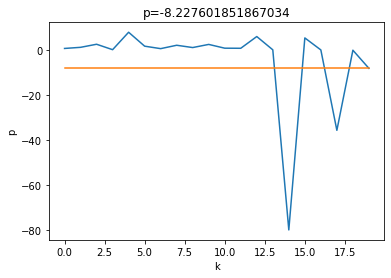

Approximate convergence rate: -8.227601851867034


In [50]:
print('Approximate convergence rate:', approx_convergence_rate(path_SR1,[1,1],1,True))

In [51]:
err = np.linalg.norm(np.diff(path_SR1,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.00010971334318083837

Superlinear convergence rate because the limit value is close to 0

## DFP Method

In [52]:
x,y = 1.2,1.2
path_DFP = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx   # -H * gradient
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k   x_{k+1} = x_k + alpha * pk
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k  
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2 # np.outer(vec, vec) = vec * vec^T

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 10 iterations, approximate minimum is 1.9721522630525295e-31 at (1.0000000000000004, 1.0000000000000009)


In [53]:
print('Approximate convergence rate:', approx_convergence_rate(path_DFP,[1,1],5))

Approximate convergence rate: 9.997557599671778


In [54]:
err = np.linalg.norm(np.diff(path_DFP,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.00023280839890673632

Superlinear convergence rate

In [55]:
x,y = -1.2,1
path_DFP = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx   # -H * gradient
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k   x_{k+1} = x_k + alpha * pk
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k  
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2 # np.outer(vec, vec) = vec * vec^T

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 22 iterations, approximate minimum is 2.0010566028157128e-20 at (1.0000000001402927, 1.0000000002823979)


In [56]:
print('Approximate convergence rate:', approx_convergence_rate(path_DFP,[1,1],2))

Approximate convergence rate: -4.20782340802865


In [57]:
err = np.linalg.norm(np.diff(path_DFP,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.00010966746026993221

superlinear convergence rate

## BFGS Method

In [58]:
x,y = 1.2,1.2    # initial point
path_BFGS = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 10 iterations, approximate minimum is 1.2449211160519093e-30 at (0.9999999999999999, 0.9999999999999999)


In [59]:
print('Approximate convergence rate:', approx_convergence_rate(path_BFGS,[1,1],1))

Approximate convergence rate: 2.0212010565576857


In [60]:
err = np.linalg.norm(np.diff(path_BFGS,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.0002326323557902368

Superlinear convergence rate

In [61]:
x,y = -1.2,1    # initial point
path_BFGS = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    def subproblem1D(alpha):
      return objFunc([x,y] + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    alpha = res.x
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 22 iterations, approximate minimum is 2.002112254270269e-20 at (1.0000000001403309, 1.0000000002824738)


In [62]:
print('Approximate convergence rate:', approx_convergence_rate(path_BFGS,[1,1],1))

Approximate convergence rate: -8.227744871469328


In [63]:
err = np.linalg.norm(np.diff(path_BFGS,axis=0),axis=1) # ||x_{k+1}-x_k||
err[-1]/err[-2]

0.00010967919824387476

Superlinear convergence rate